---

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [1]:
!pip install -U pandas-profiling
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

  Using cached pydantic-1.8.2-cp37-cp37m-macosx_10_9_x86_64.whl (2.6 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.7.4
    Uninstalling pydantic-1.7.4:
      Successfully uninstalled pydantic-1.7.4


In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# pd.reset_option('^display.', silent=True)

In [3]:
# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

Training Samples: 11314
Testing Samples: 7532


In [4]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [6]:
# create tfidf instant

# transform data

# create parameter dict

# create model instance 

# instantiate a grid search object

# optimize model parameters
vect1 = TfidfVectorizer()
X_train = vect1.fit_transform(newsgroups_train['data'])
print(X_train.shape)

(11314, 101631)


In [7]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [8]:
y = newsgroups_train['target']
y.shape

(11314,)

In [9]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    3.0s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [10]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [11]:
gs1.best_score_

0.6093334396060408

In [12]:
# create and tranform a sample text 
sample_vec = vect1.transform(['The yankees are the best team in baseball'])
print(sample_vec.shape)

# use the model to classify the sample text 
gs1.predict(sample_vec)

(1, 101631)


array([9])

In [13]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

### GridSearch with BOTH the Vectoizer & Classifier

In [14]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 

# create parameter dict

# instantiate a grid search object

# optimize model parameters

pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   45.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [15]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [16]:
gs2.best_score_

0.6611273580722131

In [17]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [18]:
# Download spacy model
import spacy.cli
spacy.cli.download("en_core_web_md")

!pip install pyLDAvis
# !pip install pyLDAvis.gensim
import pyLDAvis
# import pyLDAvis.gensim 

import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy


import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/doc2vec.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import namedtuple, defaultdict, Iterable
/Users/rob/opt/anaconda3/envs/U4-S1

In [19]:
# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({
    'content': newsgroups_train['data'],
    'target': newsgroups_train['target'],
    'target_names': [newsgroups_train['target_names'][i] for i in newsgroups_train['target']]
})
print(df.shape)
df.head()

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
(11314, 3)


,content,target,target_names
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [20]:
pd.set_option('display.max_colwidth', 300)

df.sample(5)

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
705,# |## |#2. Professors get summers off; industry employees don't.\n# |## \n# |## What professor gets the summer off ? The primary purpose of a professor\n# |## at a university is to publish. Teaching is secondary. The summer\n# |## is when professors are able to do the research required for th...,18,talk.politics.misc
161,"\n\n\nAnd I'm sure that is a great comfort to the widows and children of\nthose stabbed, beaten and burned to death. The real question is,\n""Did the crime rate in England go down, after they enacted \ngun control laws?"" If you look at the rates before and after their\nfirst such law in 1920, you...",16,talk.politics.guns
1285,I have the following Nth Engine graphics cards for sale w/drivers for \nAutoCAD R11. Display list proccessing is done through hardware.\n\nB640\t- 640x480\nB752\t- 752x580\n\nI will take the highest reanable offer.\n--,6,misc.forsale
8636,"Ok folks... \n\nI am in need for some money to purchase a Video Game Backup-Unit, so I\nhave decided to let go my SEGA CD unit... Heres the deal:\n\nSega Genesis CD/Rom Unit:\n------------------------\n o Playes Sega CD games\n o Playes Regular CD's\n o Playes CD-G's (Cd's w/graphics)\n o Co...",6,misc.forsale
8660,"\n\nBy law, they would not be allowed to do that anyhow.\n\n\n\n\n-- \n----------------------------------------------------------------------------\nGordon Banks N3JXP | ""Skepticism is the chastity of the intellect, and\ngeb@cadre.dsl.pitt.edu | it is shameful to surrender it too soon.""",13,sci.med


In [21]:
# pd.reset_option('display.max_colwidth', silent=True)
# pd.get_option("display.max_colwidth")

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# can visit (https://regex101.com/) for a regex python editor (has cheat sheets)

# 1. Remove new line characters
df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace and lowercase text
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.lower().split()))

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<ipython-input-22-0c70f6a85105>:4: DeprecationWarning: invalid escape sequence \s
  df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))
<ipython-input-22-0c70f6a85105>:7: DeprecationWarning: invalid escape sequence \S
  df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(

In [23]:
df.head()

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,clean_text
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...


In [24]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

# If you're on macOS, Linux, or python session executed from Windows Subsystem for Linux (WSL)
# conda activate U4-S1-NLP
# pip install pandarallel
#
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)
#
# df['lemmas'] = df['content'].parallel_apply(get_lemmas)
#
# Ref: https://github.com/nalepae/pandarallel

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
nlp = spacy.load("en_core_web_md", disable=['parser', 'tagger', 'ner'])

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:126: DeprecationWarning: SelectableGroups di

In [30]:
# create our tokens in the form of lemmas 
df['lemmas'] = df['clean_text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

conda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
100%|█████████▉| 11277/11314 [06:35<00:01, 31.73it/s]/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_poi

In [46]:

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
df['lemmas'] = df['clean_text'].parallel_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY

ntry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AV

In [31]:
df.head()

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,clean_text,lemmas
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...,"[wonder, enlighten, car, see, day, door, sport, car, look, late, early, call, bricklin, door, small, addition, bumper, separate, rest, body, know, tellme, model, engine, spec, year, production, car, history, info, funky, look, car, mail]"
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...,"[fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, poll, send, brief, message, detail, experience, procedure, speed, attain, cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, disk, functionality, floppy, especially, request, summarize, day, add, ne..."
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...,"[folk, mac, plus, finally, give, ghost, weekend, start, life, way, sooo, market, new, machine, bite, soon, intend, look, pick, powerbook, maybe, bunch, question, hopefully, somebody, answer, anybody, know, dirt, round, powerbook, introduction, expect, hear, suppose, appearence, summer, haven, he..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip,"[weitek, address, phone, numb, like, information, chip]"
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...,"[article, owcb, world, std, com, tombaker, world, std, com, tom, baker, understand, expect, error, basically, know, bug, warn, system, software, thing, check, don, right, value, aren, set, till, launch, suchlike, fix, code, possibly, introduce, new, bug, tell, crow, warn, liftoff, ignore]"


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [32]:
# Create Dictionary

# Term Document Frequency

# stores (token id, token count) for each doc in the corpus

id2word = corpora.Dictionary(df['lemmas'])
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# How many words are in our vocab?
len(id2word.keys())

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


61160

In [34]:
# Let's remove extreme values
id2word.filter_extremes(no_below=3, no_above=0.2)

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# How many words are in our vocab?
len(id2word.keys())

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18027

In [36]:
# Re-create DTM with new dictionary of vocab
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
id2word[200]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'destruction'

In [38]:
df.lemmas.iloc[5]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['course',
 'term',
 'rigidly',
 'define',
 'bill',
 'doubt',
 'use',
 'term',
 'quote',
 'allegedly',
 'read',
 'article',
 'present',
 'argument',
 'weapon',
 'mass',
 'destruction',
 'commonly',
 'understand',
 'switch',
 'topic',
 'point',
 'evidently',
 'weapon',
 'allow',
 'late',
 'analysis',
 'give',
 'understand',
 'consider',
 'class']

In [39]:
corpus[5]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(13, 1),
 (92, 1),
 (127, 1),
 (148, 1),
 (162, 1),
 (186, 2),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 2),
 (209, 1),
 (210, 2)]

In [40]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [41]:
### This cell runs the single-processor version of the model (slower)
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100, #number of documents to consider at once (affects the memory consumption)
                                                        passes=10,  #how many times the algorithm is supposed to pass over the whole corpus
                                                        per_word_topics=True,
                                                        workers=12)


lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

/Users/rob/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
CPU times: user 20.2 s, sys: 7.42 s, total: 27.6 s
Wall time: 26.1 s


In [ ]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

### View the topics in LDA model

In [25]:
df.target_names.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

In [26]:
# display the print_topics from the model 
pprint(lda_multicore.print_topics())

[(0,
  '0.021*"god" + 0.014*"people" + 0.013*"say" + 0.011*"come" + 0.010*"jesus" + '
  '0.008*"man" + 0.008*"go" + 0.007*"tell" + 0.006*"time" + 0.006*"live"'),
 (1,
  '0.319*"max" + 0.029*"bhj" + 0.029*"giz" + 0.016*"qax" + 0.014*"bxn" + '
  '0.008*"okz" + 0.008*"nrhj" + 0.008*"lebanese" + 0.007*"biz" + '
  '0.006*"canon"'),
 (2,
  '0.010*"turkish" + 0.009*"armenian" + 0.008*"president" + 0.008*"new" + '
  '0.007*"people" + 0.007*"year" + 0.006*"russian" + 0.006*"armenians" + '
  '0.006*"university" + 0.006*"world"'),
 (3,
  '0.011*"believe" + 0.010*"exist" + 0.009*"evidence" + 0.008*"god" + '
  '0.008*"people" + 0.008*"question" + 0.008*"reason" + 0.008*"thing" + '
  '0.008*"religion" + 0.008*"atheist"'),
 (4,
  '0.008*"package" + 0.007*"book" + 0.007*"option" + 0.007*"water" + '
  '0.006*"use" + 0.006*"station" + 0.006*"circuit" + 0.006*"power" + '
  '0.006*"new" + 0.005*"outlet"'),
 (5,
  '0.018*"car" + 0.008*"get" + 0.007*"time" + 0.007*"good" + 0.007*"bike" + '
  '0.006*"look" +

# Part 3: Interpret LDA results & Select the appropriate number of topics

In [27]:
import pyLDAvis.gensim_models as gensimvis  # updated march 25

In [28]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_multicore, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.099764  0.135895       1        1  11.737859
17     0.044050 -0.201598       2        1   9.788423
0      0.092670  0.181210       3        1   9.361372
9      0.105877 -0.163469       4        1   8.706141
5      0.111389  0.042817       5        1   6.805410
10     0.074098 -0.065134       6        1   6.062486
13     0.104064 -0.015449       7        1   5.787221
3      0.110505  0.088994       8        1   5.575828
18     0.032046  0.109409       9        1   5.519626
19     0.107540  0.092534      10        1   5.365561
2      0.034756  0.096717      11        1   4.570662
6      0.050652 -0.204974      12        1   3.925723
7      0.052284 -0.142371      13        1   2.836258
15    -0.185545  0.076879      14        1   2.731788
14     0.013857  0.044423      15        1   2.532472
4      0.041257 -0.090917      16        1   2.314924
11    -0.090969 -0.091547      17        1   2.139443
1     -0.400537 -0.003173      18        1   1.549096
8     -0.058476  0.120064      19        1   1.348748
16    -0.339281 -0.010309      20        1   1.340960, topic_info=            Term         Freq        Total Category  logprob  loglift
1612         max  4463.000000  4463.000000  Default  30.0000  30.0000
239        drive  1931.000000  1931.000000  Default  29.0000  29.0000
80           edu  2278.000000  2278.000000  Default  28.0000  28.0000
503          key  1643.000000  1643.000000  Default  27.0000  27.0000
1124         god  2207.000000  2207.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
5431   cleveland    46.617194    58.770952  Topic20  -5.5571   4.0801
455          air   108.314585   368.809943  Topic20  -4.7141   3.0865
1700      church   100.666602   546.840252  Topic20  -4.7873   2.6194
1641        suck    51.971614    92.419160  Topic20  -5.4484   3.7361
10989        lib    59.635659   200.132130  Topic20  -5.3108   3.1011

[1415 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
5678       9  0.973771          abc
5678      18  0.012326          abc
5272       4  0.981859  accelerator
5272       8  0.009918  accelerator
3354      10  0.966297     activate
...      ...       ...          ...
25        20  0.000353         year
3891       5  0.981612        yeast
10583     11  0.979371      yeltsin
14189     19  0.982925      zionism
6893      19  0.976316      zionist

[5473 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 18, 1, 10, 6, 11, 14, 4, 19, 20, 3, 7, 8, 16, 15, 5, 12, 2, 9, 17])

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”


In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
%%time
start=2
limit=42
step=4
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=start, limit=limit, step=step)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 9min 58s, sys: 53.9 s, total: 10min 52s
Wall time: 18min 48s


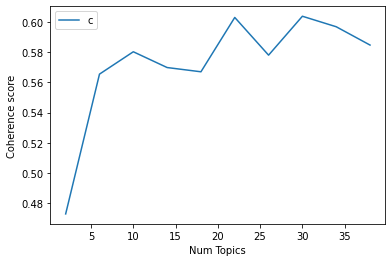

In [53]:
# use these values for the plot if compute_coherence_values takes too long to run 
# coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.473
Num Topics = 6  has Coherence Value of 0.5654
Num Topics = 10  has Coherence Value of 0.5802
Num Topics = 14  has Coherence Value of 0.5698
Num Topics = 18  has Coherence Value of 0.567
Num Topics = 22  has Coherence Value of 0.603
Num Topics = 26  has Coherence Value of 0.578
Num Topics = 30  has Coherence Value of 0.6038
Num Topics = 34  has Coherence Value of 0.5968
Num Topics = 38  has Coherence Value of 0.5847


In [49]:
# Select the model and print the topics
optimal_model = model_list[np.where(np.array(x)==14)[0][0]]
# optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.031*"drive" + 0.010*"disk" + 0.009*"system" + 0.009*"car" + 0.009*"scsi" '
  '+ 0.009*"use" + 0.008*"hard" + 0.007*"work" + 0.007*"power" + 0.007*"dos"'),
 (1,
  '0.016*"space" + 0.007*"year" + 0.006*"launch" + 0.006*"program" + '
  '0.005*"university" + 0.005*"new" + 0.005*"nasa" + 0.005*"work" + '
  '0.005*"president" + 0.005*"earth"'),
 (2,
  '0.013*"go" + 0.011*"people" + 0.009*"time" + 0.009*"say" + 0.008*"get" + '
  '0.008*"want" + 0.008*"thing" + 0.008*"come" + 0.007*"good" + 0.007*"right"'),
 (3,
  '0.011*"state" + 0.007*"gun" + 0.007*"law" + 0.007*"government" + '
  '0.007*"people" + 0.006*"right" + 0.005*"use" + 0.005*"israel" + '
  '0.005*"case" + 0.005*"report"'),
 (4,
  '0.022*"wire" + 0.011*"grind" + 0.009*"circuit" + 0.008*"edu" + '
  '0.006*"neutral" + 0.006*"chz" + 0.005*"bank" + 0.005*"gordon" + '
  '0.005*"current" + 0.005*"pitt"'),
 (5,
  '0.024*"file" + 0.017*"edu" + 0.011*"program" + 0.010*"com" + 0.008*"mail" + '
  '0.008*"list" + 0.007*"window" + 0.007

In [60]:
pprint(', '.join(df.lemmas.iloc[1]))
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

('fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, '
 'poll, send, brief, message, detail, experience, procedure, speed, attain, '
 'cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, '
 'disk, functionality, floppy, especially, request, summarize, day, add, '
 'network, knowledge, base, clock, upgrade, haven, answer, poll, thank')


[(4, 0.09227603),
 (7, 0.33894992),
 (9, 0.23398502),
 (14, 0.11904929),
 (17, 0.16868949),
 (18, 0.032466915)]

# Appendix

### Bertopic 

In [ ]:
https://pypi.org/project/bertopic/
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

## LDA with Anchor

In [ ]:
!pip install corextopic
 
from corextopic import corextopic as ct
from corextopic import vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice
 
vectorizer = vectorizer.fit(data)
tfidf = vectorizer.transform(data)
vocab = vectorizer.get_feature_names()

anchors = []
anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

model = ct.Corex(n_hidden=8, seed=42)
ss_ldamodel_Anchor = model.fit(
    tfidf,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength = 4 # Tell the model how much it should rely on the anchors
)